# Bigram Language Modeling using frequency counts for generating Onion-like News Headlines

## Imports & Inits

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

import pdb, sys, warnings, os, json, torch, re
warnings.filterwarnings(action='ignore')

from IPython.display import display, HTML
from pathlib import Path

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4)
sns.set_style("darkgrid")
%matplotlib inline

## Functions

In [2]:
def plot_bigram_counts(ax, bigram_counts, vocab):
  itos = {i:s for i,s in enumerate(vocab)}  
  ax.imshow(bigram_counts, cmap='Blues')
  for i in range(len(stoi)):
    for j in range(len(stoi)):
      chstr = f'{itos[i]}{itos[j]}'
      ax.text(j, i, chstr, ha='center', va='bottom', color='gray')
      ax.text(j, i, bigram_counts[i,j].item(), ha='center', va='top', color='gray')
  ax.axis('off')  

## Data Setup

In [3]:
try:
  onion_df = pd.read_csv('../data/cleaned_onion_headlines.csv')
except FileNotFoundError:
  onion_df = pd.read_csv('../data/original_onion_headlines.csv')
  onion_df['text'] = onion_df['text'].str.encode('ascii', 'ignore').str.decode('ascii')
  onion_df['text'] = onion_df['text'].apply(str.lower)
  onion_df['text'] = onion_df['text'].apply(lambda t: re.sub('[$=`+@*#_]', '', t))
  onion_df.to_csv('../data/cleaned_onion_headlines.csv', index=None)

onion_df.shape

(14363, 1)

In [4]:
onion_df['length'] = onion_df['text'].apply(len)
onion_df['length'].describe()

count    14363.000000
mean        77.819745
std         30.673678
min          1.000000
25%         56.500000
50%         75.000000
75%         94.000000
max        283.000000
Name: length, dtype: float64

## Bigram Language Model

In [5]:
texts = onion_df['text'].tolist()
vocab = ['#'] + sorted(list(set(' '.join(texts))))
stoi = {s:i for i,s in enumerate(vocab)}
itos = {i:s for i,s in enumerate(vocab)}
len(vocab)

55

In [6]:
bigram_counts = torch.zeros(len(stoi), len(stoi), dtype=torch.int32)
for text in texts:
  chs = ['#'] + list(text) + ['#']
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    bigram_counts[idx1, idx2] += 1    

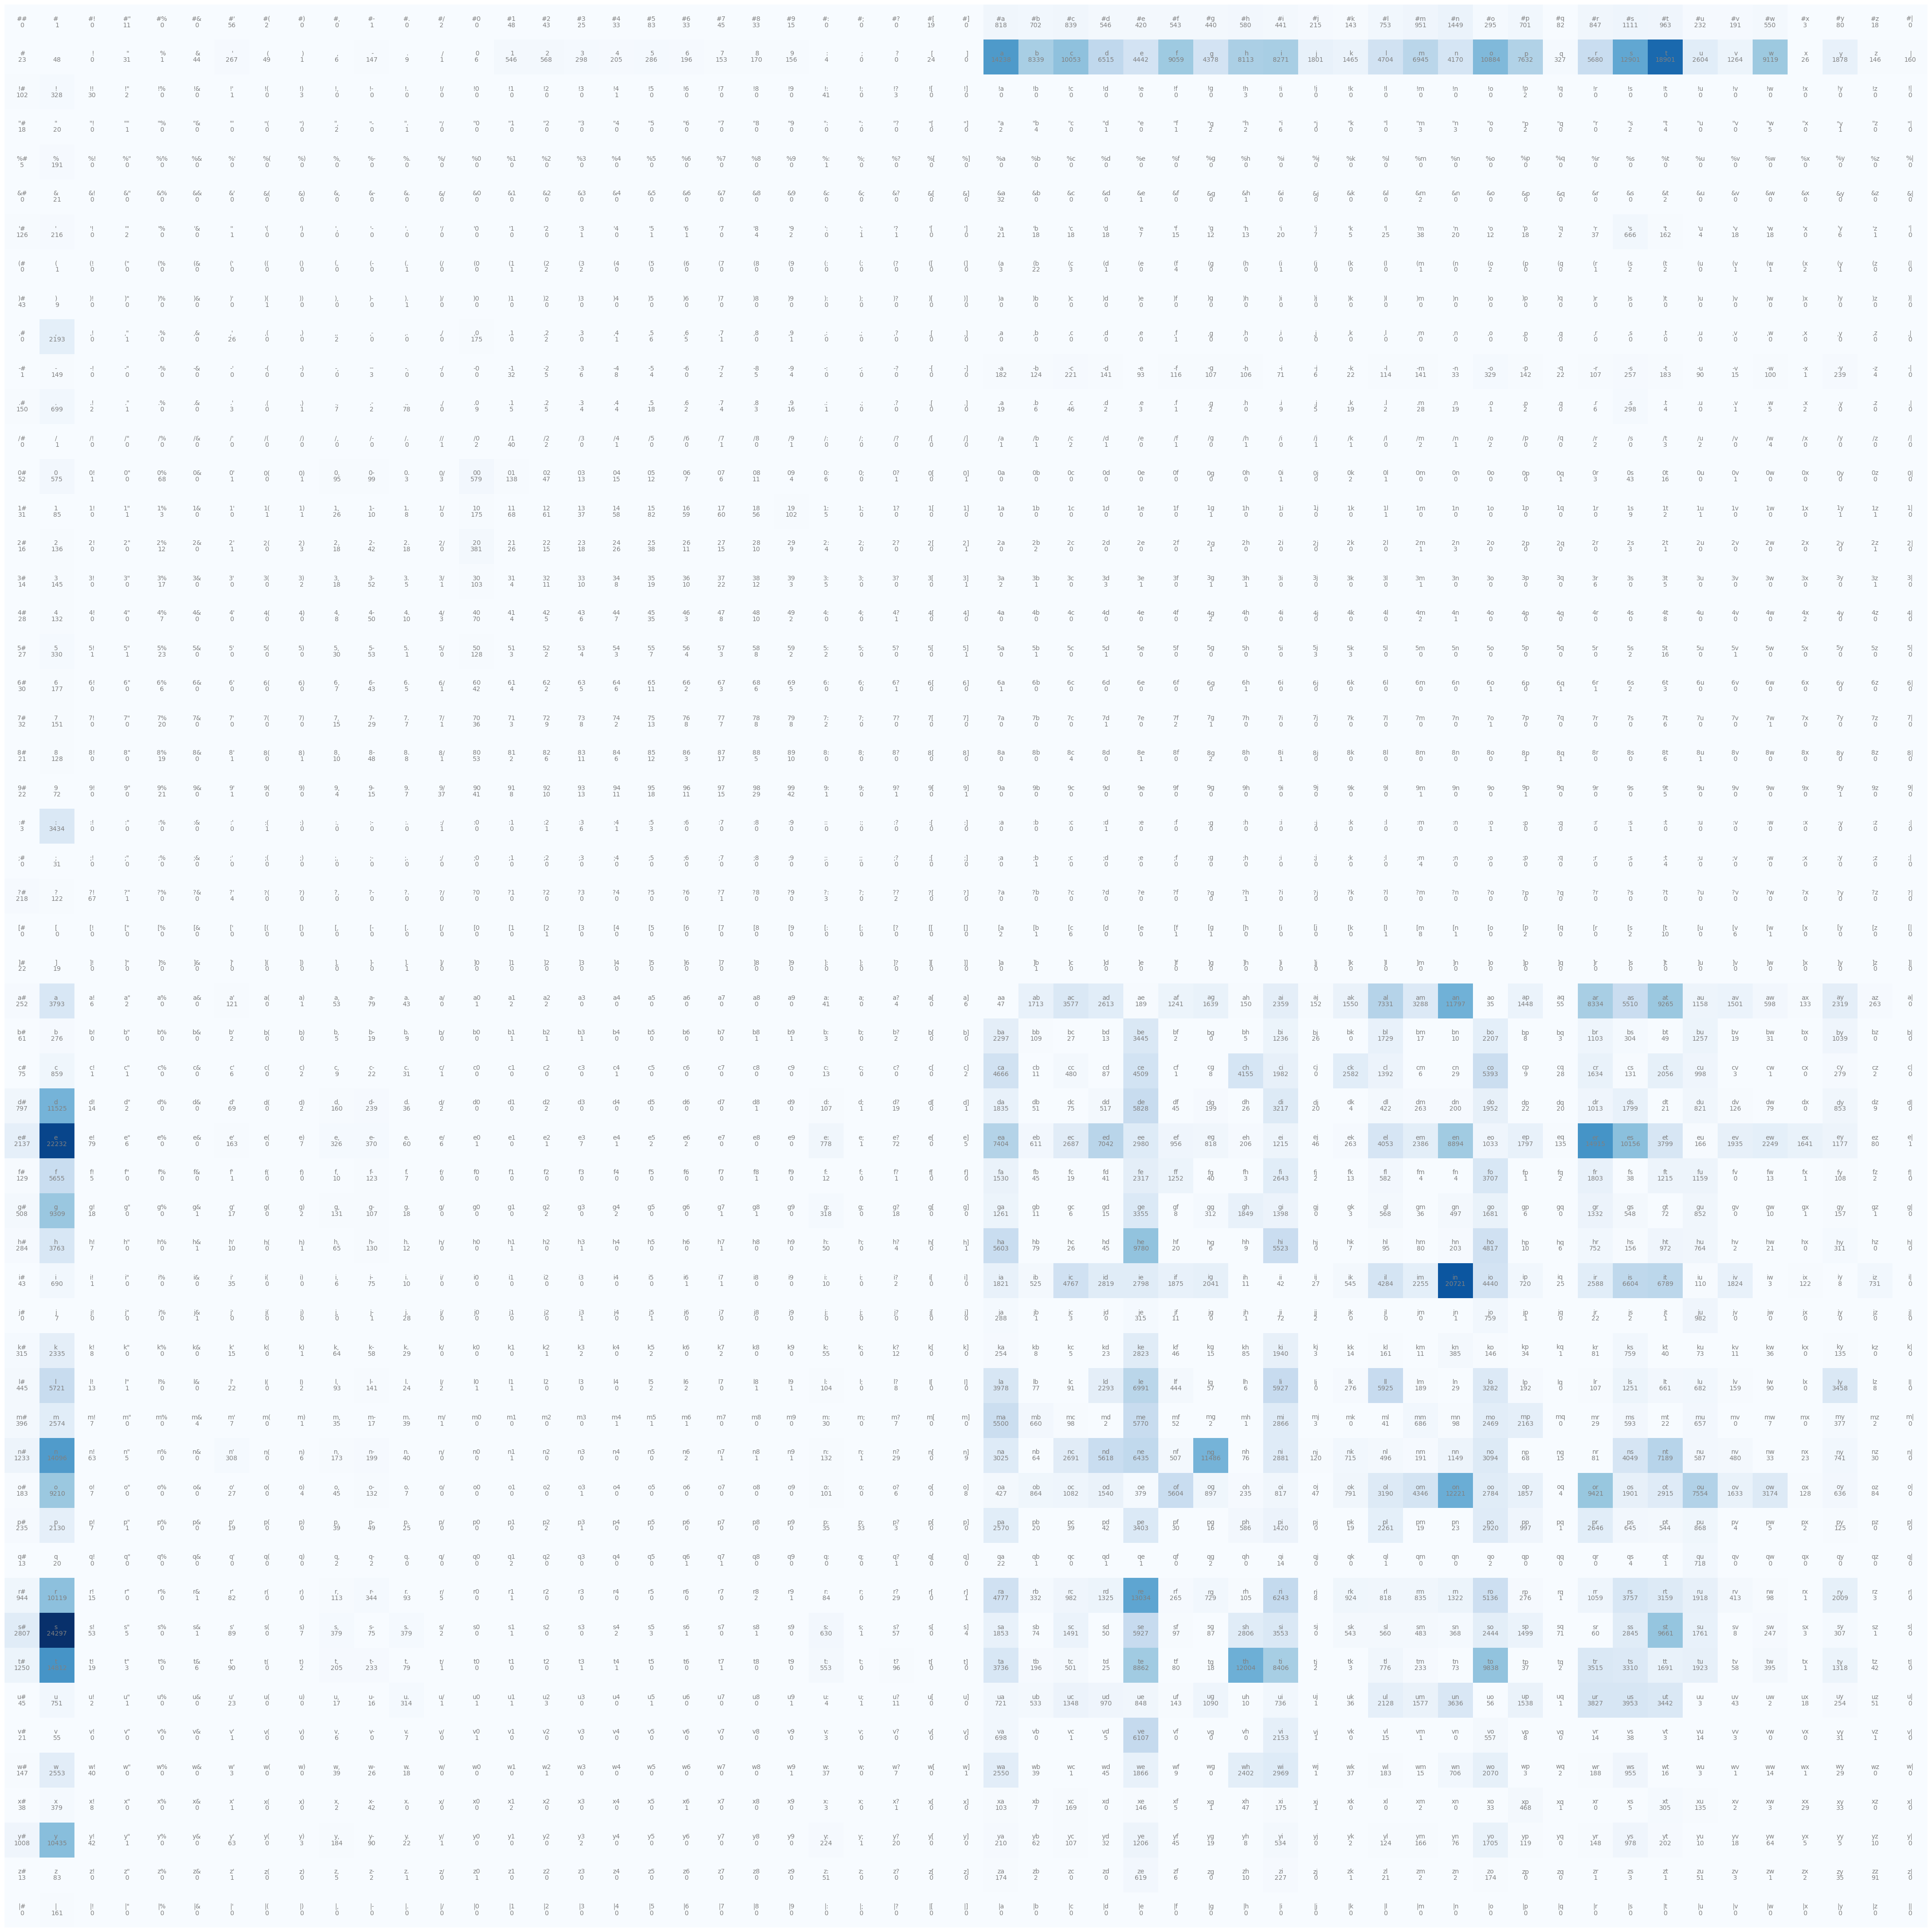

In [7]:
fig, ax = plt.subplots(1,1,figsize=(len(vocab),len(vocab)))
plot_bigram_counts(ax, bigram_counts, vocab)

In [8]:
bigram_counts[0]

tensor([   0,    1,    0,   11,    0,    0,   56,    2,    0,    0,    1,    0,
           2,    0,   48,   43,   25,   33,   83,   33,   45,   33,   15,    0,
           0,    0,   19,    0,  818,  702,  839,  546,  420,  543,  440,  580,
         441,  215,  143,  753,  951, 1449,  295,  701,   82,  847, 1111,  963,
         232,  191,  550,    3,   80,   18,    0], dtype=torch.int32)

In [9]:
p = bigram_counts[0].float()/bigram_counts[0].sum()
p

tensor([0.0000e+00, 6.9623e-05, 0.0000e+00, 7.6586e-04, 0.0000e+00, 0.0000e+00,
        3.8989e-03, 1.3925e-04, 0.0000e+00, 0.0000e+00, 6.9623e-05, 0.0000e+00,
        1.3925e-04, 0.0000e+00, 3.3419e-03, 2.9938e-03, 1.7406e-03, 2.2976e-03,
        5.7787e-03, 2.2976e-03, 3.1331e-03, 2.2976e-03, 1.0444e-03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.3228e-03, 0.0000e+00, 5.6952e-02, 4.8876e-02,
        5.8414e-02, 3.8014e-02, 2.9242e-02, 3.7805e-02, 3.0634e-02, 4.0382e-02,
        3.0704e-02, 1.4969e-02, 9.9561e-03, 5.2426e-02, 6.6212e-02, 1.0088e-01,
        2.0539e-02, 4.8806e-02, 5.7091e-03, 5.8971e-02, 7.7352e-02, 6.7047e-02,
        1.6153e-02, 1.3298e-02, 3.8293e-02, 2.0887e-04, 5.5699e-03, 1.2532e-03,
        0.0000e+00])

In [10]:
bigram_probs = bigram_counts.float()/bigram_counts.sum(axis=1, keepdim=True)

In [11]:
bigram_probs[0] == p

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True])

In [12]:
g = torch.Generator().manual_seed(2468975301)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'r'

In [13]:
g = torch.Generator().manual_seed(2468975301)
n_headlines = 20
for _ in range(n_headlines):
  idx = 0
  ai_onion = []
  while True:
    idx = torch.multinomial(bigram_probs[idx], num_samples=1, replacement=True, generator=g).item()
    ai_onion.append(itos[idx])
    if idx == 0:
      break
  print(''.join(ai_onion[:-1]))    

rthag criersthorte: wia mul angharlvetarinallarery upldicenet anctisu arco coyo tveromo kicee: pp s re telicin, camme nousceetolllemit me tas carndm be baimow gal den athas d m
fos saste cos a g y te h d fetowiti andsintinancamer alelyoompe
s p e cexvepar cefobes po tsucewod ptehocigiksistingre eershed s ine l d tacen isechoss uperathagsthedumeratebang ca bonns thed
me linatiny us geivexisalapeabur forer
atiofed ll'bat
hus caucy, akin fo s ditsidag un-itoumaliouysteyst ome
novils ws he jurerngy piry tidvio h, alonlstilkeins
bean
r firtodn em thewaninflinesaphan a babin 84-fat
panco d retutare on lste tan t o d roud, astetseriten at kl binie incofi re iffoummamimbucke 500% d g d tstye
deathe pale in co blourtran cleshere s t fery ewinof-y mioknelichine vese
poubif mod jefimepin'
n pller tr meat hean-ry: s o t ry tho tay hnfus tyieryoneveatowathemal s s fomintee
mies
p ointhed cheereve.shlsal brkullothif sss.cccon peshunshing s m w woor thorople sammace uis
uthist taly flllan indes plyif

GOAL: Maximize the liklihood of the data w.r.t model parameters (statistical modeling). This is equivalent to:
1. maximizing the log liklihood (because log is monotonic)
2. minimizing the negative log liklihood
3. minimizing the average negative logliklihood

In [14]:
cnn_headline = 'Trump goes to Supreme Court over Mar-a-Lago search and seizure of documents.'.lower()
onion_headline = 'High Schoolers Given Detention For Cutting Class During Active Shooting.'.lower()

In [18]:
log_likelihood = 0.
n = 0
for text in texts:
  chs = ['#'] + list(text) + ['#']
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    prob = bigram_probs[idx1, idx2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    # print(f"{ch1}{ch2}: {prob:0.4f} {logprob:0.4f}")
    n += 1

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")    
print(f"average nll {-log_likelihood/n:0.4f}")

log_likelihood=tensor(-2870245.2500)
nll=tensor(2870245.2500)
average nll 2.5354
